<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski <br>
        L. Neumann <br>
        M. Kißgen <br></p>
        <p><strong>2024-06-17</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table> 
<div class="clearfix"></div>
<center>
    <h1> Datenbanken und Informationssysteme (SoSe 2024)</h1>    
    <h1> Übung 8 - Transaktionsmanagement</h1>
</center>

<center>
    <h4>Abgabe bis 2024-06-21 12:15 Uhr</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook in Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 21. Juni vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Dokumentations-Notebook</h3>

Wir empfehlen ihnen das zu dieser Übung zugehörige [ Dokumentations-Notebook ](doku/Doku-Transaktionsmanagement.ipynb) zu lesen. Zusätzlich zur der Handhabung der verschiedenen verwendeten Tools werden dort zentrale Konzepte der Vorlesung noch einmal wiederholt. Sie finden das Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=39633">Moodle Lernraum</a>.

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Gruppenteilnehmer</h4>
<ul>
    <li>Florian Assmuth, 449348</li>
    <li>Elisona Agalliu, 430455</li>
    <li>Beren Kapanci, 424273</li>
    <li>Erik Fedrau, 433793</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>

In [1]:
 %pip install -q "dbis-exc-manager~=1.0.1" "graphviz~=0.20.3" "dbis-tm~=2.0.1"
error=None
try:
    # import libraries
    import warnings
    from excmanager.Task import Exercise, Task, SubTask
    from dbis_tm import ConflictGraph, ConflictGraphNode, SyntaxCheck
    from IPython.display import display, HTML   
    # Initialize task structure
    exercise = Exercise(8)
    task_1 = Task(exercise, "8.1")
    task_2 = Task(exercise, "8.2")
    task_3 = Task(exercise, "8.3")
    tasks_ready = {"8.1": {}, "8.2": {}, "8.3": {}}
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2>Etwas ist beim import schief gelaufen:</h1>{error}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1>OK, es kann los gehen!</h1></div>"))


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<div class="pull-left">
    <h2> Aufgabe 8.1 (Serialisierbarkeit) </h2>
</div>

<div class="pull-right">
    <h3> (7 Punkte) </h3>
</div>

<div class="pull-left">

<h3>8.1 a)</h3>

</div>

<div class="pull-right">

<h4>(4 Punkte)</h4>

</div>

Bestimmen Sie für die Schedules $s_1$, $s_2$, $s_3$, $s_4$ die bereinigte Konfliktmengen $conf(s_1)$, $conf(s_2)$, $conf(s_3)$, $conf(s_4)$. $s_1$, $s_2$, $s_3$, $s_4$ enthalten Transaktionen $t_1$, $t_2$ und $t_3$, die auf den Datenelementen $a$,$b$,$c$ arbeiten.

$s_1$ = $r_3(a)~w_3(c)~c_3~w_1(b)~w_2(a)~w_2(c)~w_1(a)~r_1(a)~c_1~r_2(a)~w_2(a)~r_2(b)~w_2(c)~c_2$  \
$s_2$ = $r_1(a)~w_3(c)~r_3(c)~w_2(c)~r_1(c)~r_3(b)~r_3(b)~r_2(b)~c_3~c_1~a_2$ \
$s_3$ = $r_1(b)~w_3(a)~r_2(c)~w_3(b)~c_3~w_2(a)~w_1(b)~a_2~w_1(a)~r_1(c)~r_1(a)~w_1(b)~r_1(b)~c_1$  \
$s_4$ = $w_3(c)~r_2(c)~w_1(c)~w_2(a)~w_2(b)~r_2(a)~w_1(a)~w_1(c)~c_2~w_3(b)~r_1(a)~a_1~w_3(a)~c_3$

In [2]:
########################################################
# Gegebene Schedules (bitte nicht ändern)
s1 = "r3(a) w3(c) c3 w1(b) w2(a) w2(c) w1(a) r1(a) c1 r2(a) w2(a) r2(b) w2(c) c2"
s2 = "r1(a) w3(c) r3(c) w2(c) r1(c) r3(b) r3(b) r2(b) c3 c1 a2"
s3 = "r1(b) w3(a) r2(c) w3(b) c3 w2(a) w1(b) a2 w1(a) r1(c) r1(a) w1(b) r1(b) c1"
s4 = "w3(c) r2(c) w1(c) w2(a) w2(b) r2(a) w1(a) w1(c) c2 w3(b) r1(a) a1 w3(a) c3"
########################################################
# Beispiel für eine Lösung:
#s2_conf = {
#    ("w_2(x)","r_3(x)"),
#    ("r_1(y)","w_2(y)"),
#    ("w_1(y)","w_3(y)")
#}
s1_conf = {("r_3(a)","w_2(a)"),
           ("r_3(a)","w_1(a)"),
           ("w_3(c)","w_2(c)"),
           ("w_1(b)","r_2(b)"),
           ("w_2(a)","w_1(a)"),
           ("w_2(a)","r_1(a)"),
           ("w_1(a)","r_2(a)"),
           ("w_1(a)","w_2(a)"),
           ("r_1(a)","w_2(a)")
          }
s2_conf = {("w_3(c)","r_1(c)"),
           ("r_3(c)","r_1(c)")
          }
s3_conf = {("r_1(b)","w_3(b)"),
           ("w_3(a)","w_1(a)"),
           ("w_3(a)","r_1(a)"),
           ("w_3(b)","w_1(b)"),
           ("w_3(b)","r_1(b)")
          }
s4_conf = {("w_3(c)","r_2(c)"),
           ("w_2(a)","w_3(a)"),
           ("w_2(b)","w_3(b)"),
           ("r_2(a)","w_3(a)")
          }
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.1 a1, a2, a3, a4 und mit 1+1+1+1 Punkten
subtask1 = SubTask(task_1, "a1", points = 1)
subtask2 = SubTask(task_1, "a2", points = 1)
subtask3 = SubTask(task_1, "a3", points = 1)
subtask4 = SubTask(task_1, "a4", points = 1)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
tasks_ready[subtask3.task.task][subtask3.subtask] = True
tasks_ready[subtask4.task.task][subtask4.subtask] = True
msg1 = SyntaxCheck.check_conf_set_syntax(s1_conf)
if not msg1 is None:
    warnings.warn(msg1)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
msg2 = SyntaxCheck.check_conf_set_syntax(s2_conf)
if not msg2 is None:
    warnings.warn(msg2)
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
msg3 = SyntaxCheck.check_conf_set_syntax(s3_conf)
if not msg3 is None:
    warnings.warn(msg3)
    tasks_ready[subtask3.task.task][subtask3.subtask] = False
msg4 = SyntaxCheck.check_conf_set_syntax(s4_conf)
if not msg4 is None:
    warnings.warn(msg4)
    tasks_ready[subtask4.task.task][subtask4.subtask] = False

# Bitte ignorieren
subtask1.setSolution(s1_conf)
subtask2.setSolution(s2_conf)
subtask3.setSolution(s3_conf)
subtask4.setSolution(s4_conf)

In [3]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.1 b)</h3>

</div>

<div class="pull-right">

<h4>(3 Punkte)</h4>

</div>

Entscheiden Sie, ob die Konfliktmengen $conf(s_5)$, $conf(s_6)$ konfliktserialisierbar sind. Begründen Sie Ihre Entscheidung mithilfe von Konfliktgraphen. (Gehen Sie davon aus, dass die Transaktionen am Ende alle committen.)

$conf(s_5)$ = $\{(w_3(b), w_2(b)), ~
            (r_1(b), w_2(b)), ~
            (w_2(b), w_3(b)), ~
            (w_2(a), w_3(a)), ~
            (w_2(b), r_3(b)), ~
            (r_3(b), w_2(b)), ~
            (r_2(c), w_3(c)), ~
            (r_2(a), w_3(a)), ~
            (r_1(b), w_3(b))\}$
        
$conf(s_6)$ = $\{(w_3(c), r_2(c)), ~
(w_1(c), w_3(c)), ~
(w_1(c), w_2(c)), ~
(r_3(b), w_2(b)), ~
(w_1(c), r_2(c)), ~
(w_3(c), w_2(c)), ~
(w_3(a), r_2(a))\}$

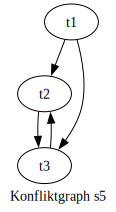

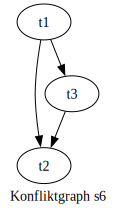

In [4]:
########################################################
# Gegebene Schedules
s5_conf = {('w3(b)', 'w2(b)'), ('r1(b)', 'w2(b)'), ('w2(b)', 'w3(b)'), ('w2(a)', 'w3(a)'), ('w2(b)', 'r3(b)'), ('r3(b)', 'w2(b)'), ('r2(c)', 'w3(c)'), ('r2(a)', 'w3(a)'), ('r1(b)', 'w3(b)')}
s6_conf = {('w3(c)', 'r2(c)'), ('w1(c)', 'w3(c)'), ('w1(c)', 'w2(c)'), ('r3(b)', 'w2(b)'), ('w1(c)', 'r2(c)'), ('w3(c)', 'w2(c)'), ('w3(a)', 'r2(a)')}
t1 = ConflictGraphNode(1)
t2 = ConflictGraphNode(2)
t3 = ConflictGraphNode(3)
########################################################
# Konfliktgraph für Schedule s5
conf_g5 = ConflictGraph("s5")
# mit add_edge fügen Sie Knoten zum Konfliktgraphen hinzu
# conf_g5.add_edge(t#,t#)
conf_g5.add_edge(t1,t2)
conf_g5.add_edge(t1,t3)
conf_g5.add_edge(t3,t2)
conf_g5.add_edge(t2,t3)
# Bitte auf True oder False setzen
s5_serializable = True

# Konfliktgraph für Schedule s6
conf_g6 = ConflictGraph("s6")
# mit add_edge fügen Sie Knoten zum Konfliktgraphen hinzu
# conf_g6.add_edge(t#,t#)
conf_g6.add_edge(t1,t2)
conf_g6.add_edge(t1,t3)
conf_g6.add_edge(t3,t2)
# Bitte auf True oder False setzen
s6_serializable = False
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.1 b1 und b2 mit 1.5+1.5 Punkten
subtask1 = SubTask(task_1, "b1", points = 1.5)
subtask2 = SubTask(task_1, "b2", points = 1.5)

# Graphvisualisierung
display(conf_g5.get_graphviz_graph())
display(conf_g6.get_graphviz_graph())

# Sanity check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if s5_serializable == None:
    warnings.warn("Bitte machen Sie eine Angabe für die Serialisierbarkeit von s5")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
if s6_serializable == None:
    warnings.warn("Bitte machen Sie eine Angabe für die Serialisierbarkeit von s6")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False


# Bitte ignorieren
subtask1.setSolution((conf_g5, s5_serializable))
subtask2.setSolution((conf_g6, s6_serializable))

In [5]:
# Autograder, bitte ignorieren

<div class="pull-left">
    <h2> Aufgabe 8.2 (Recovery) </h2>
</div>

<div class="pull-right">
    <h3> (7 Punkte) </h3>
</div>

Für die folgenden Schedules sollen Sie Multiple Choice Fragen zu Schedules und den Klassen $RC$, $ACA$ und $ST$ beantworten. Bitte wählen Sie immer **alle** korrekten Möglichkeiten aus.

<div class="pull-left">

<h3>8.2 a)</h3>

</div>

<div class="pull-right">

<h4>(1 Punkt)</h4>

</div>

Multiple Choice Aufgabe: \
$s_{11}= r_3(c)~w_1(c)~r_2(c)~w_2(a)~r_3(a)~r_2(a)~w_1(b)~a_1~c_3~r_2(b)~c_2$

Welche der Aussagen stimmen für $s_{11}$? Wählen Sie **alle** zutreffenden Aussagen aus!

a. Der $s_{11}$ ist nicht in $RC$ weil: $t_2$ $b$ von $t_1$ in $s_1$ liest und $a_1 <_{s_{11}} c_2$.\
b. Der $s_{11}$ ist in $RC$.\
c. Der $s_{11}$ ist nicht in $RC$ weil: $t_2$ $c$ von $t_1$ in $s_1$ liest und $c_1 <_{s_{11}} c_2$. \
d. Der $s_{11}$ ist nicht in $RC$ weil: $t_3$ $a$ von $t_2$ in $s_1$ liest und $c_3 <_{s_{11}} c_2$. 

In [6]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = {'d'}
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 8.2 d1 mit 0.5 Punkten
subtask1 = SubTask(task_2, "a1", points = 0.5)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(result)

In [7]:
# Autograder, bitte ignorieren

$s_{12} = w_1(a)~r_3(b)~r_2(b)~a_3~r_1(a)~w_1(c)~a_1~w_2(c)~r_2(a)~c_2$

Welche der Aussagen stimmen für $s_{12}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_{12}$ ist nicht in $ST$ wegen: $ w_1(a)<_{s_{12}}r_1(a)$.\
b. $s_{12}$ ist nicht in $ST$ wegen: $ w_1(c)<_{s_{12}}w_2(c)$.\
c. $s_{12}$ ist in $ST$.\
d. $s_{12}$ ist nicht in $ST$ wegen: $ r_3(b)<_{s_{12}}r_2(b)$. 

In [8]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = {'c'}
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 d2 mit 0.5 Punkten
subtask1 = SubTask(task_2, "a2", points = 0.5)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
    
# Bitte ignorieren
subtask1.setSolution(result)

In [9]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 b)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>


$s_2$ = $r_3(b)~w_1(a) ~w_3(a)~ w_2(c) ~a_1~ r_3(b)~ w_3(c)~ w_3(a)~ w_2(a)~ r_3(b)~ w_3(c) ~w_3(c)~ w_3(a)~ c_2~ a_3$

Welche der Aussagen stimmen für $s_{2}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_2$ ist in $RC$.\
b. $s_2$ ist nicht in $RC$ und es gibt exakt 1 Gegenbeispiel.\
c. $s_2$ ist nicht in $RC$ wegen: $t_2$ liest von $t_3 \land c_2 \in s_2$ aber $c_3 \not< c_2$.\
d. $s_2$ ist in $ACA$.\
e. $s_2$ ist nicht in $ACA$ und es gibt exakt 3 Gegenbeispiele.\
f. $s_2$ ist nicht in $ACA$ weil es einen Konflik auf der Variable $c$ gibt.\
g. $s_2$ ist in $ST$.\
h. $s_2$ ist nicht in $ST$ und es gibt exakt 4 Gegenbeispiele.\
i. $s_2$ ist nicht in $ST$ wegen: $w_3(a)<_{s_2} w_2(a) \land a_3 \not< w_2(a) \land c_3 \not< w_2(a)$.\
j. $s_2$ ist nicht in $ACA$ weil er nicht in $RC$ ist.\
k. $s_2$ ist nicht in $ST$ weil er nicht in $ACA$ ist.

In [10]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
s2_result = {'a','d','i'}
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 a mit 2 Punkten
subtask1 = SubTask(task_2, "b", points = 2)

# Sanity Check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
if s2_result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in s2_result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(s2_result)

In [11]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 c)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

$s_3$ = $w_2(a)~ r_2(c)~ r_3(b)~ w_3(a)~ w_2(a)~ w_1(c) ~r_3(b) ~c_1 ~w_3(a) ~w_2(a) ~w_2(a)~ w_2(c)~r_3(c)~ c_2 ~c_3$

Welche der Aussagen stimmen für $s_{3}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_3$ ist in $RC$.\
b. $s_3$ ist nicht in $RC$ wegen: $t_2 \text{ liest von } t_3 \text{ in } s_3 \land c_2 \in s_3 \land c_3 \not<_{s_3} c_2$.\
c. $s_3$ ist nicht in $RC$ und es gibt exakt 1 Gegenbeispiel.\
d. $s_3$ ist in $ACA$.\
e. $s_3$ ist nicht in $ACA$ und es gibt exakt 2 Gegenbeispiele.\
f. $s_3$ ist nicht in $ACA$ wegen: $t_3 \text{ liest } c \text{ von } t_2 \in s_3 \land c_2 \not<_{s_3} r_3(c)$.\
g. $s_3$ ist in $ST$.\
h. $s_3$ ist nicht in $ST$ wegen: $w_2(a) <_{s_3} w_3(a) \land a_2\not<_{s_3}  w_3(a) \land c_2\not<_{s_3}  w_3(a)$.\
i. $s_3$ ist nicht in $ST$ und es gibt exakt 3 Gegenbeispiele.\
j. $s_3$ ist nicht in $ACA$ weil er nicht in $RC$ ist.\
k. $s_3$ ist nicht in $ST$ weil er nicht in $ACA$ ist.

In [12]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
s3_result = {'a','f','i'}
# IHR CODE HIER
#raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 b mit 2 Punkten
subtask1 = SubTask(task_2, "c", points = 2)

# Sanity Check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
if s3_result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in s3_result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(s3_result)

In [13]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 d)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Multiple Choice Aufgabe: Der folgende Schedule liegt in $ST$. \
$s_4$ = $r_2(c) ~w_1(b)~ w_1(a)~ w_1(c)~ w_1(a)~ a_1~ w_3(c)~ r_2(b)~ r_2(a)~ a_3~ w_2(b) ~r_2(a) ~w_2(c)~ c2$

Welche Aussage gehört zu dem Beweis, dass $s_4$ in $ST$ liegt?

a. $r_2(c) <_{s_4} w_1(c) \land a_2 <_{s_4} w_1(c) \land c_2 \not<_{s_4} w_1(c)$\
b. $w_1(b) <_{s_4} w_2(c) \land a_1 <_{s_4} w_2(c) \land c_1 \not<_{s_4} w_2(c) $\
c. $w_3(c) <_{s_4} w_2(c) \land a_3 <_{s_4}  w_2(c) \land c_3 \not<_{s_4} w_2(c) $\
d. $w_1(c) <_{s_4} w_2(c) \land   a_1 \not<_{s_4} w_2(c) \land c_1 <_{s_4} w_2(c) $\
e. $w_1(a) <_{s_4} r_2(a) \land a_1 <_{s_4} r_2(a) \land c_1 \not<_{s_4} r_2(a) $\
f. $ w_1(b) <_{s_4} r_2(b) \land a_1 \not<_{s_4} r_2(b) \land c_1 \not<_{s_4} r_2(b) $

In [14]:
########################################################
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = {'c','e'}
# IHR CODE HIER
#raise NotImplementedError()

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 c mit 2 Punkten
subtask1 = SubTask( task_2, "d", points = 2)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == {}:
    warnings.warn(f"Bitte geben Sie mindestens eine Antwort an.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(result)

In [15]:
# Autograder, bitte ignorieren

<div class="pull-left">
    <h2> Aufgabe 8.3 (Scheduling) </h2>
</div>

<div class="pull-right">
    <h3> (6 Punkte) </h3>
</div>

<h1 style="color: red">ACHTUNG</h1>
In dieser Aufgabe sollen die Ausgaben von C2PL- S2PL- und SS2PL-Schedulern für eine gegebene Transaktion bestimmt werden. Geben Sie bei den Ausgaben der Scheduler das Setzen und Freigeben von Sperren mit an. Zusätzlich zu den C2PL, S2PL und SS2PL Sperrprotokollen, sollen die Scheduler Sperren erst anfordern, wenn sie benötigt werden, Sperren wieder freigeben, sobald dies möglich ist (ältere Sperren werden bevorzugt) und Operationen nicht weiter verzögern als notwendig. Sollte ein Scheduler die Wahl haben, Sperren freizugeben oder weitere Operationen auszuführen, so soll er das Freigeben der Sperren vorziehen.
Zudem müssen commits vorgezogen werden, wenn bereits alle Operationen der Transaktion durchgeführt und alle Sperren der Transaktion aufgehoben wurden.<br>
<b>Falls der Scheduler einen Deadlock produziert, geben Sie dies an und begründen Sie.</b>

### Hinweis
Ein Deadlock ist zum Beispiel gegeben, wenn die Transaktion $t_1$ auf einer Sperre, die von $t_2$ gehalten wird, wartet und gleichzeitig die Transaktion $t_2$ auf eine Sperre, die von $t_1$ gehalten wird, wartet, wobei keine dieser Transaktionen ihre Sperren lösen kann.

<div class="pull-left">

<h3>8.3 a)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_1$. Bestimmen Sie die Ausgabe eines C2PL-Schedulers für die Eingabe $s_1$:

$s_1$ = $r_2(z) ~w_1(y) ~r_3(x) ~w_2(x)~ w_1(z)~ w_3(y) ~r_1(y) ~c_1 ~w_2(x)~ r_2(y)~ c_3~ w_2(y)~ r_2(x) ~c_2$

Beantworten Sie zusätzlich folgende Frage:

Nehmen Sie an, dass ein Scheduler den Schedule bearbeitet, welcher die Reihenfolge der Operationen im gegebenen Schedule nicht ändert. Tritt dann hier ein Deadlock auf? 

Tragen Sie dies in die Angabe **result** ein.

In [16]:
########################################################
# Gegebener Schedule
s1 = "r2(z) w1(y) r3(x) w2(x) w1(z) w3(y) r1(y) c1 w2(x) r2(y) c3 w2(y) r2(x) c2"
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_1 = ""

# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()
# IHR CODE HIER
# raise NotImplementedError()

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 a1,a2 mit jeweils 1 Punkt
subtask1 = SubTask( task_3, "a1", points = 1)
subtask2 = SubTask( task_3, "a2", points = 1)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

msg=SyntaxCheck.check_schedule_syntax(schedule_1)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(1,s1,schedule_1)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_1)
subtask2.setSolution(result)

/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/3915158932.py:27: UserWarning: Bitte tragen Sie etwas in result ein!
  warnings.warn(f"Bitte tragen Sie etwas in result ein!")
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/3915158932.py:35: UserWarning: Leerer Schedule kann keine Lösung sein
  warnings.warn(msg)
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/3915158932.py:40: UserWarning: schedule_1 enthält unterschiedliche oder nicht alle Operationen aus s1
  warnings.warn(msg)


In [17]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.3 b)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_2$. Bestimmen Sie die Ausgabe eines S2PL-Schedulers für die Eingabe $s_2$:

$s_2$ = $w_2(x)~r_2(y) ~w_1(z) ~w_2(y) ~c_1 ~w_3(x)~ w_2(y) ~c_2 ~w_3(z) ~r_3(z)~ w_3(y)~ w_3(y)~ r_3(z) ~c_3$

Beantworten Sie zusätzlich folgende Frage:

Nehmen Sie an, dass ein Scheduler den Schedule bearbeitet, welcher die Reihenfolge der Operationen im gegebenen Schedule nicht ändert. Tritt dann hier ein Deadlock auf? 

Tragen Sie dies in die Angabe **result** ein.

In [18]:
########################################################
# Gegebener Schedule
s2 = "w2(x) r2(y) w1(z) w2(y) c1 w3(x) w2(y) c2 w3(z) r3(z) w3(y) w3(y) r3(z) c3"
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_2 = ""

# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()
# IHR CODE HIER
# raise NotImplementedError()
result = {False}

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 a1,a2 mit jeweils 1 Punkt
subtask1 = SubTask( task_3, "b1", points = 1)
subtask2 = SubTask( task_3, "b2", points = 1)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

msg=SyntaxCheck.check_schedule_syntax(schedule_2)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(2,s2,schedule_2)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_2)
subtask2.setSolution(result)

/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/527605066.py:28: UserWarning: Bitte tragen Sie etwas in result ein!
  warnings.warn(f"Bitte tragen Sie etwas in result ein!")
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/527605066.py:36: UserWarning: Leerer Schedule kann keine Lösung sein
  warnings.warn(msg)
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/527605066.py:41: UserWarning: schedule_2 enthält unterschiedliche oder nicht alle Operationen aus s2
  warnings.warn(msg)


In [19]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.3 c)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_3$. Bestimmen Sie die Ausgabe eines SS2PL-Schedulers für die Eingabe $s_3$:

$s_3$ = $w_2(x)~ w_3(x)~ r_1(y)~ r_3(x)~ w_1(z)~ c_2 ~r_1(x) ~w_1(x)~ w_3(x) ~c_1 ~r_3(y) ~w_3(x) ~w_3(x)~ c_3$

Beantworten Sie zusätzlich folgende Frage:

Nehmen Sie an, dass ein Scheduler den Schedule bearbeitet, welcher die Reihenfolge der Operationen im gegebenen Schedule nicht ändert. Tritt dann hier ein Deadlock auf? 

Tragen Sie dies in die Angabe **result** ein.

In [20]:
########################################################
# Gegebener Schedule
s3 = "w2(x) w3(x) r1(y) r3(x) w1(z) c2 r1(x) w1(x) w3(x) c1 r3(y) w3(x) w3(x) c3 "
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_3 = ""

# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()
# IHR CODE HIER
# raise NotImplementedError()


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 a1,a2 mit jeweils 1 Punkt
subtask1 = SubTask( task_3, "c1", points = 1)
subtask2 = SubTask( task_3, "c2", points = 1)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

msg=SyntaxCheck.check_schedule_syntax(schedule_3)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(3,s3,schedule_3)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_3)
subtask2.setSolution(result)

/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/2347328291.py:28: UserWarning: Bitte tragen Sie etwas in result ein!
  warnings.warn(f"Bitte tragen Sie etwas in result ein!")
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/2347328291.py:36: UserWarning: Leerer Schedule kann keine Lösung sein
  warnings.warn(msg)
/var/folders/90/jwk38l754h1g0bm6nrq7559m0000gn/T/ipykernel_3664/2347328291.py:41: UserWarning: schedule_3 enthält unterschiedliche oder nicht alle Operationen aus s3
  warnings.warn(msg)


In [21]:
# Autograder, bitte ignorieren

In [22]:
# overview
tasks =["8.1","8.2","8.3"]
from IPython.display import display, HTML
points = 0

for t in tasks:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}:</h4></div>"))

    task = exercise.getTaskByLabel(t)
    subtasks = task.getSubtasks()
    for i in subtasks:
        display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}{subtasks[i].subtask}):</h4></div>"))
        try:
            subTaskGraph = subtasks[i].getSolution()
        except Exception as e:
            display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
            continue
        else:
            if not tasks_ready[subtasks[i].task.task][subtasks[i].subtask]:
                display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
                continue
            points += subtasks[i].getPoints()
            display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks[i].getPoints()} Punkte) </div>"))

display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/20 Punkte gefunden.</h3></div><hr />"))